Hui (Henry) Chen<br>
New York Institute of Technology<br>
DTSC 710 - Machine Learning<br>
Project Assignment 1<br>
26/09/2021<br>
<br>
Professor: Dr. Kiran Balagani<br>
Dataset: https://archive.ics.uci.edu/ml/datasets/car+evaluation

# Preprocessing

In [37]:
import pandas as pd
import numpy as np
from scipy.stats import norm

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

from sklearn.naive_bayes import CategoricalNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

In [38]:
header = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]
dataset = pd.read_csv("./dataset/car.data", names=header, encoding="utf-8")

## Check data info

In [39]:
dataset.head(5)

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [40]:
dataset.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,high,high,2,more,small,high,unacc
freq,432,432,432,576,576,576,1210


In [41]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


## Check missing data

In [42]:
def check_missing_data(df):
    '''
    check missing data from the given dataset/
    
    INPUT:
        df: dataframe
    
    OUTPUT:
        return the result of missing data in percentage
    '''
    missing_values_count = df.isnull().sum()
    
    tot_cells = np.product(df.shape)
    
    tot_missing = missing_values_count.sum()

    # percent of data that is missing
    return ((tot_missing/tot_cells) * 100)

In [43]:
print("Missing data is: {} %".format(check_missing_data(dataset)))

Missing data is: 0.0 %


## Check all distinct value in each col

In [44]:
dataset.nunique()

buying      4
maint       4
doors       4
persons     3
lug_boot    3
safety      3
class       4
dtype: int64

In [45]:
for item in dataset.columns:
    temp = dataset[item].value_counts()
    print(temp, end="\n\n")

high     432
vhigh    432
med      432
low      432
Name: buying, dtype: int64

high     432
vhigh    432
med      432
low      432
Name: maint, dtype: int64

2        432
5more    432
4        432
3        432
Name: doors, dtype: int64

more    576
2       576
4       576
Name: persons, dtype: int64

small    576
med      576
big      576
Name: lug_boot, dtype: int64

high    576
med     576
low     576
Name: safety, dtype: int64

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64



## Spliting the dataset into input matrix features and class

In [46]:
x = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

## Encoding the categorical data

* Nominal data: "doors" and "persons"<br>
* Ordinal data: "buying", "maint", "lug_boot", "safety"
* Class label: "class"
<br><br>
- Ref: https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/

### Nominal (OneHot) and Ordinal Encoding

#### Training Set

In [47]:
#x[:, 3]

In [48]:
x

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med
...,...,...,...,...,...,...
1723,low,low,5more,more,med,med
1724,low,low,5more,more,med,high
1725,low,low,5more,more,big,low
1726,low,low,5more,more,big,med


In [49]:
target_col_onehot = ["doors", "persons"]
target_col_ordinal = ["buying", "maint", "doors", "persons", "lug_boot", "safety"]

full_pipeline = ColumnTransformer(transformers=[
    # ('encoder_onehote', OneHotEncoder(), target_col_onehot),
    ('encoder_ordinal', OrdinalEncoder(), target_col_ordinal)
], remainder='passthrough')

In [50]:
x = np.array(full_pipeline.fit_transform(x))

In [51]:
x.shape

(1728, 6)

In [52]:
for item in x:
    print(item, end="\n")

[3. 3. 0. 0. 2. 1.]
[3. 3. 0. 0. 2. 2.]
[3. 3. 0. 0. 2. 0.]
[3. 3. 0. 0. 1. 1.]
[3. 3. 0. 0. 1. 2.]
[3. 3. 0. 0. 1. 0.]
[3. 3. 0. 0. 0. 1.]
[3. 3. 0. 0. 0. 2.]
[3. 3. 0. 0. 0. 0.]
[3. 3. 0. 1. 2. 1.]
[3. 3. 0. 1. 2. 2.]
[3. 3. 0. 1. 2. 0.]
[3. 3. 0. 1. 1. 1.]
[3. 3. 0. 1. 1. 2.]
[3. 3. 0. 1. 1. 0.]
[3. 3. 0. 1. 0. 1.]
[3. 3. 0. 1. 0. 2.]
[3. 3. 0. 1. 0. 0.]
[3. 3. 0. 2. 2. 1.]
[3. 3. 0. 2. 2. 2.]
[3. 3. 0. 2. 2. 0.]
[3. 3. 0. 2. 1. 1.]
[3. 3. 0. 2. 1. 2.]
[3. 3. 0. 2. 1. 0.]
[3. 3. 0. 2. 0. 1.]
[3. 3. 0. 2. 0. 2.]
[3. 3. 0. 2. 0. 0.]
[3. 3. 1. 0. 2. 1.]
[3. 3. 1. 0. 2. 2.]
[3. 3. 1. 0. 2. 0.]
[3. 3. 1. 0. 1. 1.]
[3. 3. 1. 0. 1. 2.]
[3. 3. 1. 0. 1. 0.]
[3. 3. 1. 0. 0. 1.]
[3. 3. 1. 0. 0. 2.]
[3. 3. 1. 0. 0. 0.]
[3. 3. 1. 1. 2. 1.]
[3. 3. 1. 1. 2. 2.]
[3. 3. 1. 1. 2. 0.]
[3. 3. 1. 1. 1. 1.]
[3. 3. 1. 1. 1. 2.]
[3. 3. 1. 1. 1. 0.]
[3. 3. 1. 1. 0. 1.]
[3. 3. 1. 1. 0. 2.]
[3. 3. 1. 1. 0. 0.]
[3. 3. 1. 2. 2. 1.]
[3. 3. 1. 2. 2. 2.]
[3. 3. 1. 2. 2. 0.]
[3. 3. 1. 2. 1. 1.]
[3. 3. 1. 2. 1. 2.]


In [53]:
temp_y = y

In [54]:
for item in y:
    print(item, end="\n")

unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unac

#### Test set encoding (Label Encoding)

In [55]:
le = LabelEncoder()
y = le.fit_transform(y)

In [56]:
for item in y:
    print(item)

2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
0
2
2
0
2
0
0
2
2
2
2
2
0
2
0
0
2
2
2
2
2
2
2
2
2
2
2
0
2
2
0
2
0
0
2
2
0
2
0
0
2
0
0
2
2
2
2
2
2
2
2
2
2
2
0
2
0
0
2
0
0
2
2
0
2
0
0
2
0
0
2
2
2
2
2
2
2
2
2
2
2
0
2
0
0
2
0
0
2
2
0
2
0
0
2
0
0
2
2
2
2
2
2
2
2
2
2
2
0
2
2
0
2
0
0
2
2
2
2
2
0
2
0
0
2
2
2
2
2
2
2
2
2
2
2
0
2
2
0
2
0
0
2
2
0
2
0
0
2
0
0
2
2
2
2
2
2
2
2
2
2
2
0
2
0
0
2
0
0
2
2
0
2
0
0
2
0
0
2
2
2
2
2
2
2
2
2
2
2
0
2
0
0
2
0
0
2
2
0
2
0
0
2
0
0
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


In [57]:
# for i in range(len(y)):
#     temp_uniuqe = zip(temp_y[i], y[i])
#     y_indicator = set(temp_uniuqe)
#     print("{}, {}".format(temp_y[i], y[i]))
    
temp_uniuqe = zip(temp_y, y)
y_indicator = set(temp_uniuqe)

In [58]:
y_indicator = list(y_indicator)
y_indicator

[('acc', 0), ('vgood', 3), ('unacc', 2), ('good', 1)]

In [59]:
print(type(y_indicator))

<class 'list'>


Check the data distribution

In [60]:
sns.displot(x[:, 7], kde=True, height=8, aspect=15/5)

plt.title("Estimated Distribution Plot",size=15, weight='bold')
plt.show()

IndexError: index 7 is out of bounds for axis 1 with size 6

## Splitting data into test and training set

In [61]:
'''
It is good idea to encoding the categorical data before splitting the dataset into train and test set

As per requirement, the test_size should be 0.4, 0.5, 0.25, and 0.1;
therefore, make a big list that contains various test size ratio.
'''

train_test_set = list()
train_test_ratio = [0.2, 0.4, 0.5, 0.25, 0.1]

for ratio in train_test_ratio:
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=ratio, random_state=0)
    train_test_set.append({
        "X_train": X_train, 
        "X_test": X_test, 
        "y_train": y_train, 
        "y_test": y_test
    })

In [62]:
X_train

array([[0., 3., 3., 1., 0., 2.],
       [2., 2., 2., 1., 1., 2.],
       [3., 0., 0., 0., 1., 0.],
       ...,
       [1., 1., 1., 0., 0., 1.],
       [0., 0., 0., 2., 2., 2.],
       [0., 2., 1., 1., 2., 1.]])

In [63]:
X_train.shape

(1555, 6)

In [64]:
y_test.shape

(173,)

In [65]:
for item in y_test:
    print(item, end="\n")

2
2
2
2
2
1
2
0
0
2
2
2
0
2
2
0
2
2
0
2
1
0
0
2
2
2
2
2
2
2
1
0
2
0
1
2
2
2
2
2
2
2
2
2
3
2
2
0
2
2
2
2
2
2
2
2
2
2
2
0
0
2
2
2
2
0
2
2
2
2
2
0
0
0
0
0
2
0
0
2
0
0
0
2
2
2
2
1
2
2
2
0
2
2
2
3
2
0
0
2
2
2
0
2
3
0
2
0
2
2
2
2
2
0
2
1
0
2
2
2
2
2
3
2
2
2
2
0
1
2
2
2
0
2
2
2
2
2
2
2
2
2
2
0
2
2
0
2
0
0
0
0
2
2
2
0
2
2
2
2
0
2
2
2
0
2
2
2
2
2
2
2
2


# Models

1. Naïve Bayes
2. Decision Trees
3. Random Forest

In this case, we want to have Naïve Bayes and Decision Trees together inside a loop to train the model in order to get classify boundary. For Random Forest, we need to deal separately as we need to find the optimal number of ntree for the model. 

## Init the model listing

In [66]:
# model outcome statistic
naiveBayes_model = list()
decisionTree_model = list()
randomForest_model = list()

In [67]:
# config the plot side by side
# ref: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
# plt.subplot(2, 5, 1)

## Naive Bayes && Decision Tree Model

Naïve Bayes: at ratio of 0.2 is 0.8323699421965318 % accuracy
Decision Trees: at ratio of 0.2 is 0.976878612716763 % accuracy

Naïve Bayes: at ratio of 0.4 is 0.8164739884393064 % accuracy
Decision Trees: at ratio of 0.4 is 0.9783236994219653 % accuracy

Naïve Bayes: at ratio of 0.5 is 0.8090277777777778 % accuracy
Decision Trees: at ratio of 0.5 is 0.9571759259259259 % accuracy

Naïve Bayes: at ratio of 0.25 is 0.8125 % accuracy
Decision Trees: at ratio of 0.25 is 0.9814814814814815 % accuracy

Naïve Bayes: at ratio of 0.1 is 0.861271676300578 % accuracy
Decision Trees: at ratio of 0.1 is 0.9595375722543352 % accuracy



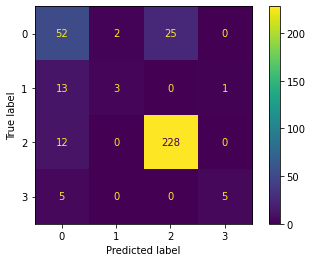

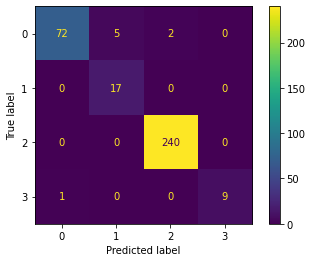

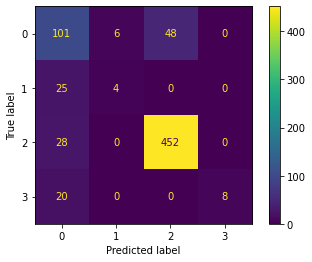

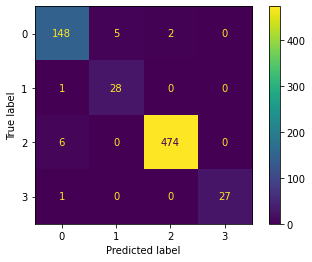

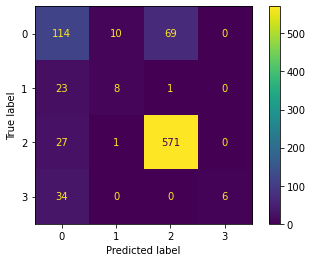

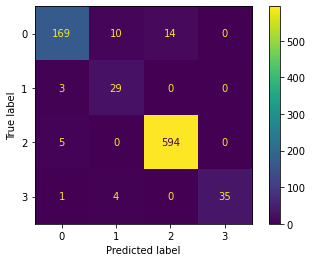

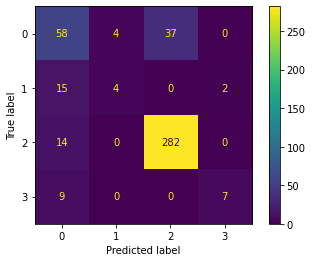

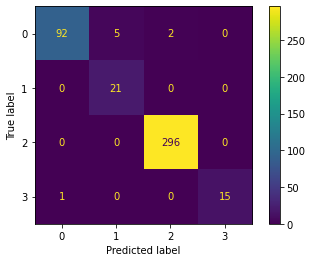

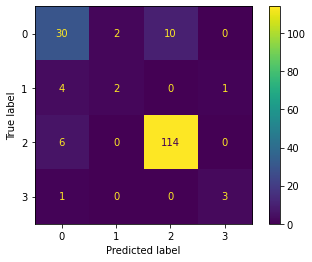

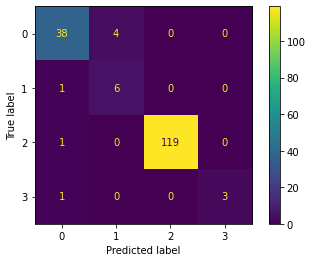

In [68]:
r = 0

for ratio_item in train_test_set:
    
    
    ############ Naïve Bayes Model ############
#     gnb = GaussianNB()
    gnb = CategoricalNB()
    gnb.fit(ratio_item['X_train'], ratio_item['y_train'])
    
    # get the y predict
    y_pred = gnb.predict(ratio_item['X_test'])
    
    # confusion matrix plotting data
    disp = plot_confusion_matrix(gnb, ratio_item['X_test'], ratio_item['y_test'])
    
    accuracy = accuracy_score(ratio_item['y_test'], y_pred)
    
    naiveBayes_model.append({
        "test_ratio": train_test_ratio[r],
        "y_pred": y_pred,
        "y_pred_compare": np.concatenate((y_pred.reshape(len(y_pred), 1), ratio_item['y_test'].reshape(len(ratio_item['y_test']), 1)), axis=1),
        "accuracy_score": accuracy,
        "confusion_matrix": disp,
    })
    
    print("Naïve Bayes: at ratio of {} is {} % accuracy".format(train_test_ratio[r], accuracy))
    
    
    ############ Decision Trees Model ############
    tree_cl = DecisionTreeClassifier(criterion="entropy", random_state=0)
    tree_cl.fit(ratio_item['X_train'], ratio_item['y_train'])
    
    y_pred = tree_cl.predict(ratio_item['X_test'])
    
    disp = plot_confusion_matrix(tree_cl, ratio_item['X_test'], ratio_item['y_test'])
    
    accuracy = accuracy_score(ratio_item['y_test'], y_pred)
    
    decisionTree_model.append({
        "test_ratio": train_test_ratio[r],
        "y_pred": y_pred,
        "y_pred_compare": np.concatenate((y_pred.reshape(len(y_pred), 1), ratio_item['y_test'].reshape(len(ratio_item['y_test']), 1)), axis=1),
        "accuracy_score": accuracy,
        "confusion_matrix": disp,
    })
    
    print("Decision Trees: at ratio of {} is {} % accuracy".format(train_test_ratio[r], accuracy), end="\n\n")
    r+=1

## Random Forest "ntree" Experiments

In [69]:
# experiments
# here, we are trying to find the optimal # of trees in the forest

def test_find_ntree():
    r = 0
    for ratio in train_test_set:
        for tree in range(1, 50):

            ############ Random Forest Model ############
            forest_cl = RandomForestClassifier(n_estimators=tree, criterion="entropy", random_state=0)
            forest_cl.fit(ratio_item['X_train'], ratio_item['y_train'])

            y_pred = tree_cl.predict(ratio_item['X_test'])

            # disp = plot_confusion_matrix(tree_cl, ratio_item['X_test'], ratio_item['y_test'])
            y_test = ratio_item['y_test']

            accuracy = accuracy_score(ratio_item['y_test'], y_pred)
            print("At ratio of {} with {} tree is {} % accuracy".format(train_test_ratio[r], tree, accuracy))
        r+=1

In [70]:
# test_find_ntree()

## Random Forest Model

At ratio of 0.2 with 4 tree is 0.9595375722543352 % accuracy
At ratio of 0.4 with 4 tree is 0.9595375722543352 % accuracy
At ratio of 0.5 with 4 tree is 0.9595375722543352 % accuracy
At ratio of 0.25 with 4 tree is 0.9595375722543352 % accuracy
At ratio of 0.1 with 4 tree is 0.9595375722543352 % accuracy


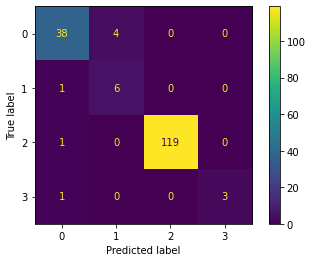

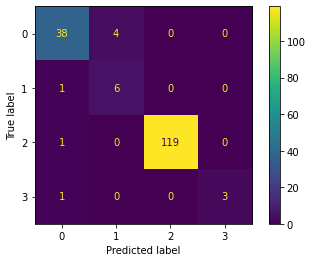

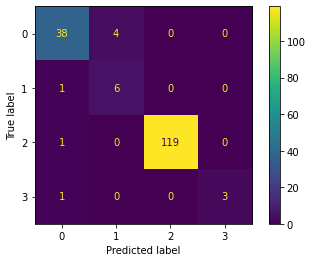

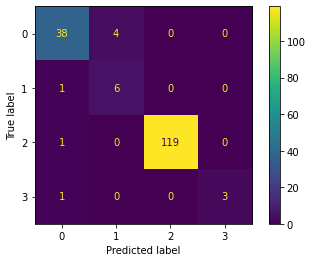

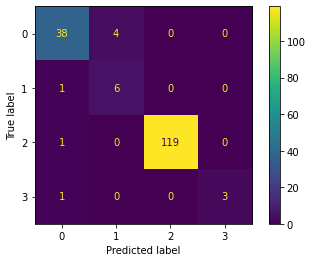

In [71]:
r = 0
for ratio in train_test_set:
        
    ############ Random Forest Model ############
    forest_cl = RandomForestClassifier(n_estimators=4, criterion="entropy", random_state=0)
    forest_cl.fit(ratio_item['X_train'], ratio_item['y_train'])

    y_pred = tree_cl.predict(ratio_item['X_test'])
    
    disp = plot_confusion_matrix(tree_cl, ratio_item['X_test'], ratio_item['y_test'])
    
    accuracy = accuracy_score(ratio_item['y_test'], y_pred)
    
    print("At ratio of {} with 4 tree is {} % accuracy".format(train_test_ratio[r], accuracy))
    
    randomForest_model.append({
        "test_ratio": train_test_ratio[r],
        "y_pred": y_pred,
        "y_pred_compare": np.concatenate((y_pred.reshape(len(y_pred), 1), ratio_item['y_test'].reshape(len(ratio_item['y_test']), 1)), axis=1),
        "accuracy_score": accuracy,
        "confusion_matrix": disp,
    })
    
    r+=1

# Analysis

## Extract correct classified per class metric

In [72]:

def extract_classified_per_class(model_list):
    '''
    extract correct classified feature per class
    
    INPUT:
        model_list: list
    '''
    index = 0

    for item in model_list:

        confusion_matrix = (item['confusion_matrix'].confusion_matrix)
        correct_classified_per_class = dict()

        for i in range(len(confusion_matrix)):

            # classification sum per features
            classified_sum = sum(confusion_matrix[i])

            # correctly classified feature
            correct_classified = confusion_matrix[i][i]

            # correct classified feature per class
            classified_per_class = correct_classified/classified_sum

            # encode the corresponding class labels
            # [('acc', 0), ('vgood', 3), ('unacc', 2), ('good', 1)]
            temp = ""
            if i == 0:
                temp = "acc"
            elif i == 1:
                temp = "good"
            elif i == 2:
                temp = "unacc"
            else:
                temp = "vgood"

            correct_classified_per_class[temp] = classified_per_class

        model_list[index]["correct_classified_per_class"] = correct_classified_per_class
        index+=1
    
    return model_list

In [73]:
print(extract_classified_per_class(naiveBayes_model))

[{'test_ratio': 0.2, 'y_pred': array([2, 2, 2, 2, 2, 3, 2, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 0, 0,
       1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       3, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0,
       2, 2, 2, 0, 2, 2, 2, 3, 2, 0, 0, 2, 2, 2, 0, 2, 3, 0, 0, 0, 2, 2,
       2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 1, 2, 2, 2,
       0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 3, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 0,
       2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 0, 0, 2, 2

In [74]:
naiveBayes_model = extract_classified_per_class(naiveBayes_model)
decisionTree_model = extract_classified_per_class(decisionTree_model)
randomForest_model = extract_classified_per_class(randomForest_model)

## Extract all model output

In [79]:
def model_output(model_list, model_name):
    print("########## Model: {} ##########".format(model_name))
    
    for item in model_list:

        test_ratio = item['test_ratio']
        training_ratio = 1-test_ratio
        accuracy = item['accuracy_score']
        correct_classified = item['correct_classified_per_class']
        disp = item['confusion_matrix']
        
        print("Test Ratio: {}\nTraining Ratio: {}\nAccuracy: {}\nCorrect Classified per class: \n{}"
              .format(test_ratio, training_ratio, accuracy, correct_classified))
        # plt.show()
        print("\n")

In [80]:
model_output(naiveBayes_model, "Naïve Bayes")

########## Model: Naïve Bayes ##########
Test Ratio: 0.2
Training Ratio: 0.8
Accuracy: 0.8323699421965318
Correct Classified per class: 
{'acc': 0.6582278481012658, 'good': 0.17647058823529413, 'unacc': 0.95, 'vgood': 0.5}


Test Ratio: 0.4
Training Ratio: 0.6
Accuracy: 0.8164739884393064
Correct Classified per class: 
{'acc': 0.6516129032258065, 'good': 0.13793103448275862, 'unacc': 0.9416666666666667, 'vgood': 0.2857142857142857}


Test Ratio: 0.5
Training Ratio: 0.5
Accuracy: 0.8090277777777778
Correct Classified per class: 
{'acc': 0.5906735751295337, 'good': 0.25, 'unacc': 0.9532554257095158, 'vgood': 0.15}


Test Ratio: 0.25
Training Ratio: 0.75
Accuracy: 0.8125
Correct Classified per class: 
{'acc': 0.5858585858585859, 'good': 0.19047619047619047, 'unacc': 0.9527027027027027, 'vgood': 0.4375}


Test Ratio: 0.1
Training Ratio: 0.9
Accuracy: 0.861271676300578
Correct Classified per class: 
{'acc': 0.7142857142857143, 'good': 0.2857142857142857, 'unacc': 0.95, 'vgood': 0.75}




In [81]:
model_output(decisionTree_model, "Decision Trees")

########## Model: Decision Trees ##########
Test Ratio: 0.2
Training Ratio: 0.8
Accuracy: 0.976878612716763
Correct Classified per class: 
{'acc': 0.9113924050632911, 'good': 1.0, 'unacc': 1.0, 'vgood': 0.9}


Test Ratio: 0.4
Training Ratio: 0.6
Accuracy: 0.9783236994219653
Correct Classified per class: 
{'acc': 0.9548387096774194, 'good': 0.9655172413793104, 'unacc': 0.9875, 'vgood': 0.9642857142857143}


Test Ratio: 0.5
Training Ratio: 0.5
Accuracy: 0.9571759259259259
Correct Classified per class: 
{'acc': 0.8756476683937824, 'good': 0.90625, 'unacc': 0.991652754590985, 'vgood': 0.875}


Test Ratio: 0.25
Training Ratio: 0.75
Accuracy: 0.9814814814814815
Correct Classified per class: 
{'acc': 0.9292929292929293, 'good': 1.0, 'unacc': 1.0, 'vgood': 0.9375}


Test Ratio: 0.1
Training Ratio: 0.9
Accuracy: 0.9595375722543352
Correct Classified per class: 
{'acc': 0.9047619047619048, 'good': 0.8571428571428571, 'unacc': 0.9916666666666667, 'vgood': 0.75}




In [82]:
model_output(randomForest_model, "Random Forest")

########## Model: Random Forest ##########
Test Ratio: 0.2
Training Ratio: 0.8
Accuracy: 0.9595375722543352
Correct Classified per class: 
{'acc': 0.9047619047619048, 'good': 0.8571428571428571, 'unacc': 0.9916666666666667, 'vgood': 0.75}


Test Ratio: 0.4
Training Ratio: 0.6
Accuracy: 0.9595375722543352
Correct Classified per class: 
{'acc': 0.9047619047619048, 'good': 0.8571428571428571, 'unacc': 0.9916666666666667, 'vgood': 0.75}


Test Ratio: 0.5
Training Ratio: 0.5
Accuracy: 0.9595375722543352
Correct Classified per class: 
{'acc': 0.9047619047619048, 'good': 0.8571428571428571, 'unacc': 0.9916666666666667, 'vgood': 0.75}


Test Ratio: 0.25
Training Ratio: 0.75
Accuracy: 0.9595375722543352
Correct Classified per class: 
{'acc': 0.9047619047619048, 'good': 0.8571428571428571, 'unacc': 0.9916666666666667, 'vgood': 0.75}


Test Ratio: 0.1
Training Ratio: 0.9
Accuracy: 0.9595375722543352
Correct Classified per class: 
{'acc': 0.9047619047619048, 'good': 0.8571428571428571, 'unacc': 0.